用いたデータ：統計科学研究所 成績csv
https://statistics.co.jp/reference/statistical_data/statistical_data.htm

1, データの読み込み\
2, kmeansでクラスタリング\
3, 決定木\
4, 次元削減\
5, まとめ

### まとめ
・特徴量に"gika"が入ったのは意外だった。\
・クラスター数を2にしているが、違う値にすることで違った結果が得られると思う\
・決定木は、分類過程が可視化できる。(機械学習の欠点であるブラックボックスが防げる)\
・特徴量が把握することができる。= 影響力が高いものを把握できる。\
・特徴量は把握できるが、1に効いているのか0に効いているのかが可視化した木を見ないとわからない。\
→ ロジットで解消できる


### データの読み込み

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### データの読み込み
seiseki = pd.read_csv("seiseki.csv")

### 要約統計量を確認

In [15]:
seiseki.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542,42.331325,62.457831,57.740964,47.307229,39.084337
std,21.835858,21.456335,24.236127,21.408130,22.894855,17.188298,26.577943,22.519397,29.507351
min,0.000000,4.000000,0.000000,9.000000,2.000000,15.000000,2.000000,2.000000,0.000000
25%,35.000000,23.000000,28.000000,31.000000,25.250000,52.000000,35.250000,31.250000,12.000000
50%,53.000000,35.000000,43.000000,49.000000,41.500000,65.000000,60.000000,48.500000,35.000000
75%,70.000000,53.750000,63.750000,65.750000,58.750000,75.750000,82.000000,65.000000,66.750000
max,96.000000,90.000000,100.000000,100.000000,96.000000,99.000000,99.000000,100.000000,99.000000


### Kmeansでクラスタリング
クラスター数：n_clusters = 2

In [3]:
### kmeansを定義する
kmeans = KMeans(n_clusters=2,random_state=0)

### kmeansを適応する
kmeans.fit(seiseki)

KMeans(n_clusters=2, random_state=0)

In [4]:
cluster = kmeans.predict(seiseki)
seiseki_cluster = seiseki.copy()

### クラスター番号を追加する
seiseki_cluster["cluster"] = cluster

### クラスター番号を追加したデータフレイムを確認する

In [56]:
seiseki_cluster.head()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,cluster
0,30,43,51,63,60,66,37,44,20,1
1,39,21,49,56,70,72,56,63,16,1
2,29,30,23,57,69,76,33,54,6,1
3,95,87,77,100,77,82,78,96,87,0
4,70,71,78,67,72,82,46,63,44,0


### 散布図
seabornにあるsns.pairplotを使うと便利。\
hue = "cluster"でクラスターによって色分けしている。

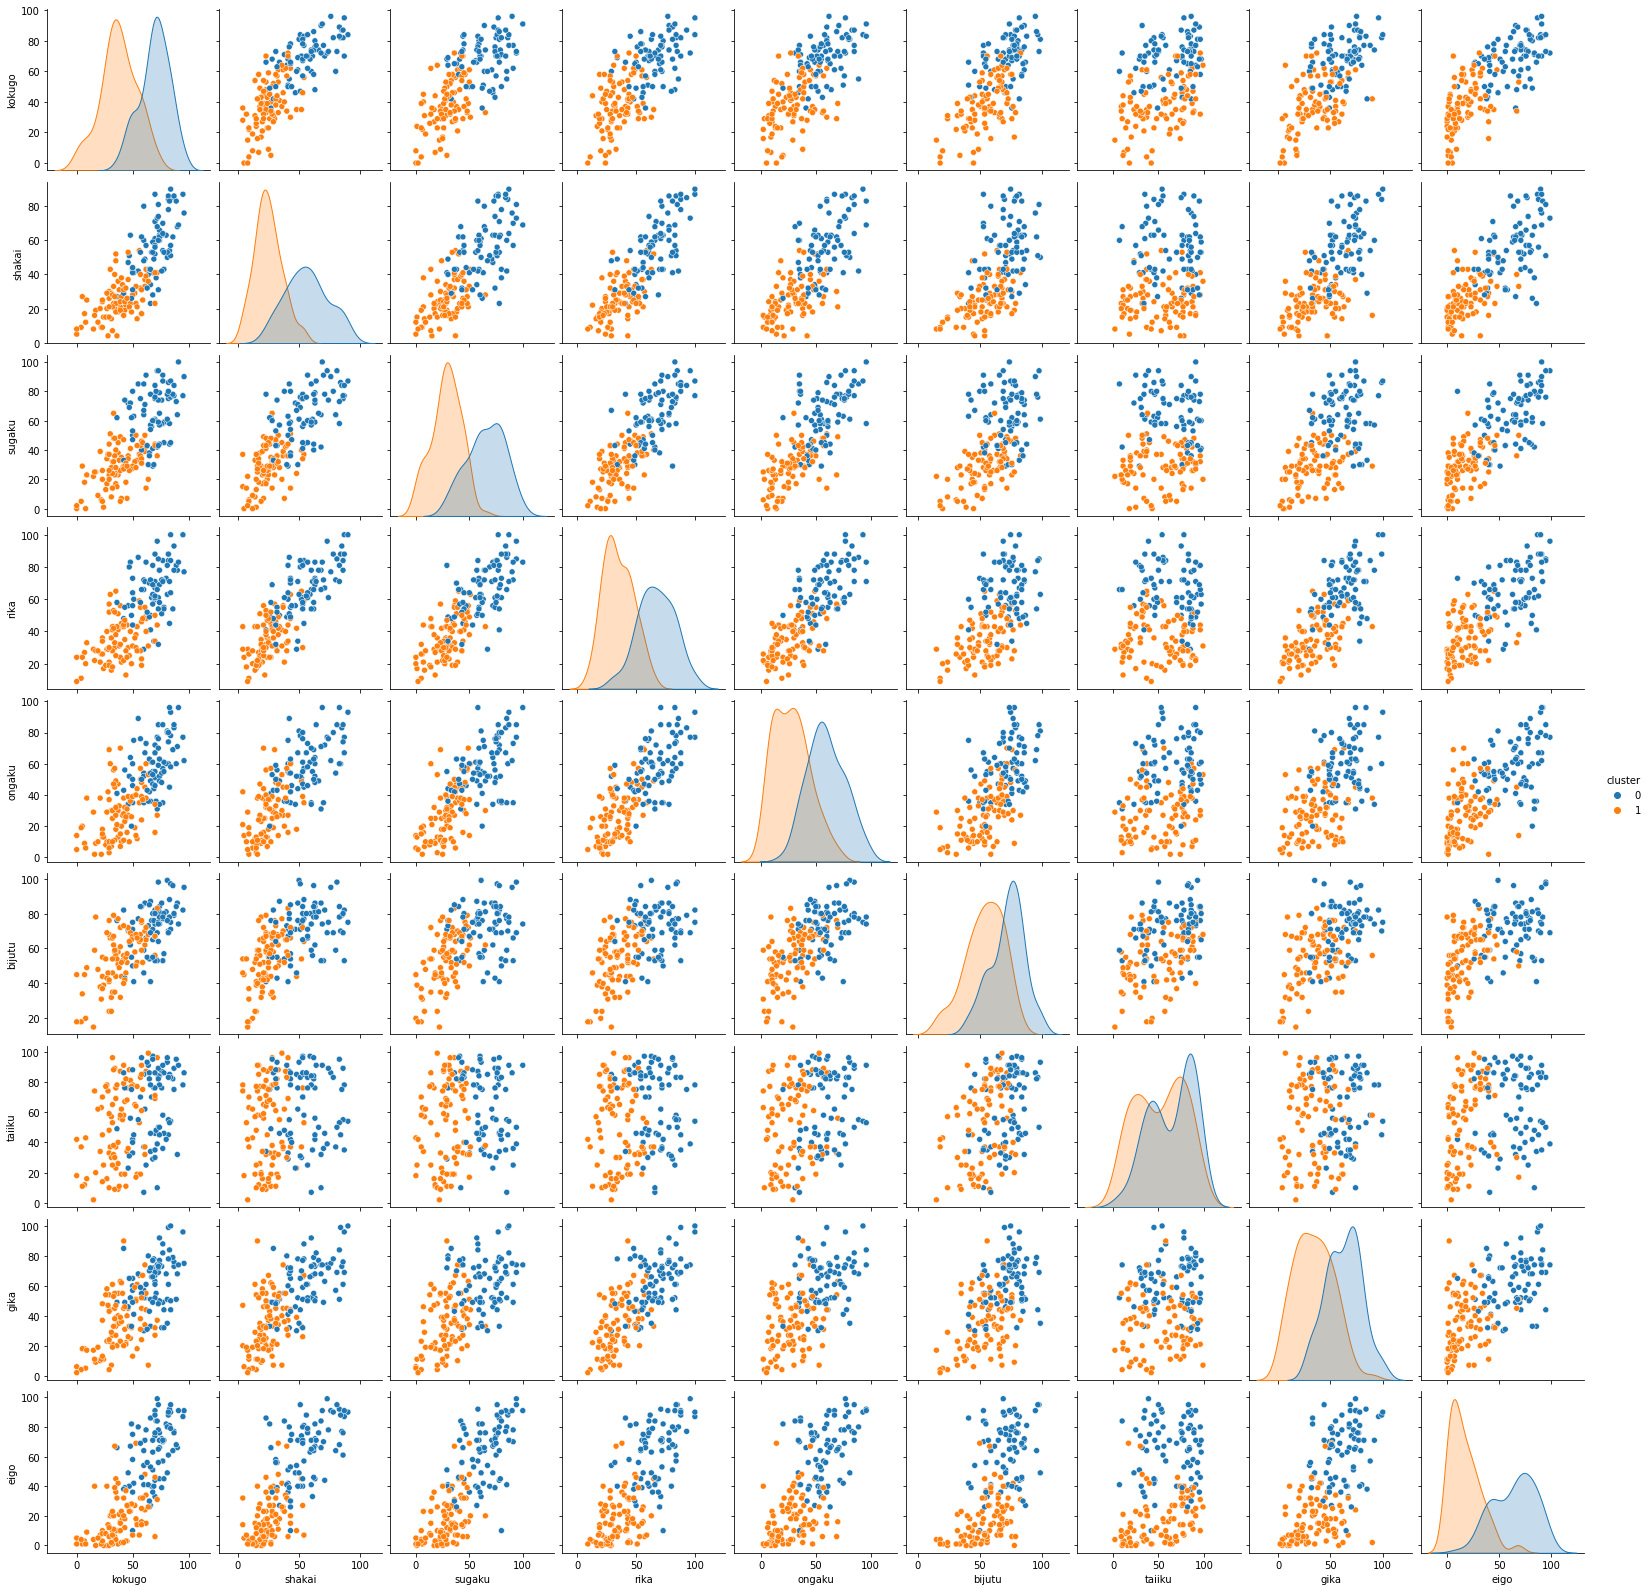

In [7]:
sns.pairplot(seiseki_cluster[:-1],hue="cluster")
plt.show()

### 決定木 

### 入力データ：x, 出力データ：t

In [30]:
t = seiseki_cluster["cluster"]
x = seiseki

### 学習データとテストデータを分割(7：３)

In [31]:
x_train,x_test,t_train,t_test = train_test_split(x,t,
                                                 test_size=0.3,
                                                 random_state=0)

### 決定木を定義 & 実行

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,t_train)

DecisionTreeClassifier(random_state=0)

### 精度評価

In [33]:
print("train score：",model.score(x_train,t_train))
print("test score：",model.score(x_test,t_test))

train score： 1.0
test score： 0.94


### 決定木 可視化

In [16]:
import graphviz
from sklearn.tree import export_graphviz

### -----以下google colabratoryで可視化可能-----

In [17]:
dot_data = export_graphviz(model)
graph_tree = graphviz.Source(dot_data)
#graph_tree

### 決定木を保存

In [ ]:
graph_tree.render("Decision Tree")

### 各科目の特徴量を確認

In [61]:
feature_importances = model.feature_importances_
feature_importances

array([0.24396825, 0.        , 0.6547619 , 0.01667676, 0.        ,
       0.        , 0.        , 0.05178571, 0.03280737])

### 上記の特徴量から、次元削減
特徴量の高かったkokugo, sugaku, rika, gika, eigoの5科目に次元削減

In [35]:
x_af = seiseki_cluster.loc[:,["kokugo","sugaku",
                      "rika","gika","eigo"]]
t = seiseki_cluster["cluster"]

In [36]:
x_train,x_test,t_train,t_test = train_test_split(x_af,t,
                                                 test_size=0.3,
                                                 random_state=0)

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_v2 = DecisionTreeClassifier(random_state=0)
model_v2.fit(x_train,t_train)

DecisionTreeClassifier(random_state=0)

In [38]:
print("train score：",model_v2.score(x_train,t_train))
print("test score：",model_v2.score(x_test,t_test))

train score： 1.0
test score： 0.94


### まとめ
・特徴量に"gika"が入ったのは意外だった。\
・クラスター数を2にしているが、違う値にすることで違った結果が得られると思う\
・決定木は、分類過程が可視化できる。(機械学習の欠点であるブラックボックスが防げる)\
・特徴量が把握することができる。= 影響力が高いものを把握できる。\
・特徴量は把握できるが、1に効いているのか0に効いているのかが可視化した木を見ないとわからない。\
→ ロジットで解消できる
